<a href="https://colab.research.google.com/github/aNDREUET648/AA_Parallel_Programming_Lab/blob/main/Celsius_Farenheit_Tensorflow_y_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf   # librería para IA hecha por Google
import numpy as np        # para poder trabajar con arrays

In [5]:
# estos son los valores que la red neuronal utilizará para aprender

# definición de los arrays donde se inicializarán con los valores entrada de los grados Celsius
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
# definición de los arrays donde se inicializarán con los valores salida de los grados Farenheit
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [6]:
# Diseñamos el modelo de red neuronal. Para ello, además de utilizar tensorflow
#  utilizaremos el Framework Keras, que nos permitirá definir las RR.NN más simples

# Ésta red neuronal será muy simple:  entrada -----------> salida  (2 neuronas)

# Definimos una 'capa' tipo densa (Dense)--> una neurona va a todas las otras neuronas 
# units -> unidades o neuronas en la capa de salida
# input_shape -> Aquí le decimos que tenemos una entrada con una neurona también.
#                Autorregistra la capa de entrada con una neurona
#
capa = tf.keras.layers.Dense(units=1, input_shape=[1])
# Definimos que crearemos un modelo secuencial (simple) utilizándolo con la 'capa'
modelo = tf.keras.Sequential([capa])

#oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
#oculta2 = tf.keras.layers.Dense(units=3)
#salida = tf.keras.layers.Dense(units=1)
#modelo = tf.keras.Sequential([oculta1, oculta2, salida])

In [7]:
# El siguiente paso es compilarlo. Prepara el modelo para ser entrenado.
# Definiremos 2 propiedades el optimizador y la función pérdida
# optimizer --> Emplearemos el Adam, y permite a la red neuronal como ajustar
#               los pesos y los sesgos de manera eficiente (que aprenda y no des-aprenda)
# loss --> para la pérdida usaremos el error cuadrático medio (mse)
modelo.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mean_squared_error'
)

In [8]:
print("Comenzando entrenamiento...")
# para entrenarlo lo haremos con la propiedad fit
# .fit(datos_entrada, resultados_esperados, vueltas que dará (épocas), resultado verbalizado no)
historial = modelo.fit(celsius, fahrenheit, epochs=1000, verbose=False)
print("Modelo entrenado!")

Comenzando entrenamiento...
Modelo entrenado!


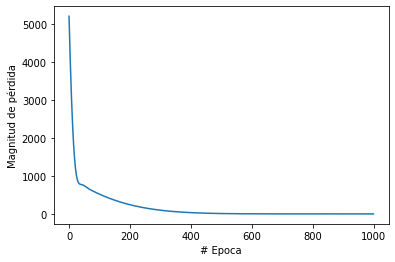

In [9]:
# Ya tenemos el modelo entrenado, ahora queremos ver el resultado de la función de pérdida (loss)
# Que tan mal están los resultados de la red en cada paso (vuelta o época)

import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

# claramente vemos que con 500 o 600 épocas la mejora es ínfima.
# Por lo que no hace falta hacer las 1000 épocas

In [10]:
# Veamos como predice 100 ºC a ºF.......
print("Hagamos una predicción!")
resultado = modelo.predict([100.0])
print("El resultado es " + str(resultado) + " fahrenheit!")

Hagamos una predicción!
El resultado es [[211.74194]] fahrenheit!


In [11]:
# Veamos como es la estructura interna de la red neuronal
print("Variables internas del modelo")
print(capa.get_weights())

# 'peso' lo asigno a 1.7982885 y el 'sesgo' a 31.913097
# Tenemos entrada = 100 ---> in*1.7982 ----> salida = (in*1.7982)+ 31.9130 
# La fórmula original de convertir de Celsius a Farenheit es:
# Farenheit = (Celsius * 1.8) + 32

#print(oculta1.get_weights())
#print(oculta2.get_weights())
#print(salida.get_weights())

Variables internas del modelo
[array([[1.7982885]], dtype=float32), array([31.913097], dtype=float32)]
